## Here we will be using our already preprocessed data

In [51]:
train = pd.read_excel('Train_dataset.xlsx')
test = pd.read_excel('Test_dataset.xlsx')
from array import array

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Creating Dummies for relevant categorical features

In [52]:
swm = pd.get_dummies(train['SWM'], drop_first=True)
swm_test = pd.get_dummies(test['SWM'], drop_first=True)
train = pd.concat([train, swm], axis = 1)
test = pd.concat([test, swm_test], axis = 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
train.drop(['City', 'Popuation [2001]', 'State', 'SWM', 'Sex Ratio', 'Median Age', 'Avg Temp', 'Water Purity', 'H Index'], axis = 1, inplace= True)
test.drop(['City','Popuation [2001]', 'State', 'SWM', 'Sex Ratio', 'Median Age', 'Avg Temp', 'Water Purity', 'H Index'], axis = 1, inplace= True)

In [54]:
amp_object = train.select_dtypes(include = np.object)
amp_int = train.select_dtypes(exclude=np.object)
amp_object1 = test.select_dtypes(include = np.object)
amp_int1 = test.select_dtypes(exclude=np.object)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Replacing mode for missing categorical values

In [55]:
#Ampute the data


for clm in amp_object.columns:
    train[clm] = train[clm].fillna(value = train[clm].mode())
    #print(train[clm].mode())
    
for clm in amp_int.columns:
    train[clm] = train[clm].fillna(value = train[clm].mean())



for clm in amp_object1.columns:
    test[clm] = test[clm].fillna(value = test[clm].mode())
    #print(test[clm].mode())
    
for clm in amp_int1.columns:
    test[clm] = test[clm].fillna(value = test[clm].mean())

In [56]:
d = {'Type': ['C-1T','M','M.Cl','MPUA','M.B','UA']}
typ = np.array(train['Type'])
for i in range(len(train)):
    if typ[i] not in d['Type']:
        typ[i]='other_type'

train['Type'] = typ
obj_clm = train.select_dtypes(include = np.object)
for c in obj_clm.columns:
    k = train[c].value_counts()
    print(c, '***'*2,'\n' ,k)
    
lst1 = []


typ1 = np.array(test['Type'])
for i in range(len(test)):
    lst1.append(0)
    if typ1[i] not in d['Type']:
        typ1[i]='other_type'

test['Type'] = typ1
obj_clm1 = test.select_dtypes(include = np.object)
for c in obj_clm1.columns:
    k = test[c].value_counts()
    print(c, '***'*2,'\n' ,k)
test['Type_MPUA'] = np.array(lst1)
test['Type_M'] = np.array(lst1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Type ****** 
 C-1T          269
M             236
other_type    123
M.Cl           59
MPUA           44
M.B            28
UA             28
Name: Type, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Type ****** 
 other_type    297
M             119
M.Cl           61
M.B            16
UA              8
Name: Type, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
test.head()

,Type,Population11,Toilets Avl,Female Population,# of hospitals,Foreign Visitors,LOW,MEDIUM,Type_MPUA,Type_M
0,other_type,36774,94.0,34237.0,17.0,2769.0,0,1,0,0
1,other_type,36754,62.0,34328.0,13.0,636502.0,0,0,0,0
2,other_type,36732,63.0,32434.0,17.0,242367.0,0,0,0,0
3,M.Cl,36706,60.0,32558.0,11.0,4408916.0,0,0,0,0
4,other_type,36669,92.0,32159.0,23.0,3104060.0,1,0,0,0


In [58]:
train.drop(obj_clm.columns,axis=1,inplace =True)
obj_clm = pd.get_dummies(obj_clm,drop_first = True)


test.drop(obj_clm1.columns,axis=1,inplace =True)
obj_clm1 = pd.get_dummies(obj_clm1,drop_first = True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Adjusting the categories for total toilets and total hospitals

In [59]:
train = pd.concat([train,obj_clm],axis =1)
train['total_toilets'] = train['# of hospitals'] * train['Toilets Avl']

test = pd.concat([test, obj_clm1],axis =1)
test['total_toilets'] = test['# of hospitals'] * test['Toilets Avl']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:

train.drop(['# of hospitals','Toilets Avl'],inplace = True,axis=1)
test.drop(['# of hospitals','Toilets Avl'],inplace = True,axis=1)

### Dropping female population due to high correlevance with Population [2011]

In [61]:
train.drop(['Female Population'] , axis=1, inplace=True)
test.drop(['Female Population'] , axis=1, inplace=True)

In [62]:
test.head()

,Population11,Foreign Visitors,LOW,MEDIUM,Type_MPUA,Type_M,Type_M.B,Type_M.Cl,Type_UA,Type_other_type,total_toilets
0,36774,2769.0,0,1,0,0,0,0,0,1,1598.0
1,36754,636502.0,0,0,0,0,0,0,0,1,806.0
2,36732,242367.0,0,0,0,0,0,0,0,1,1071.0
3,36706,4408916.0,0,0,0,0,0,1,0,0,660.0
4,36669,3104060.0,1,0,0,0,0,0,0,1,2116.0


In [63]:

x = train.drop('Covid Cases' , axis=1)
y = train['Covid Cases']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    9.5s remaining:    2.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    9.9s finished
C:\Users\Yuvi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Yuvi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[04:24:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[04:24:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
***** 0.7346482704838138


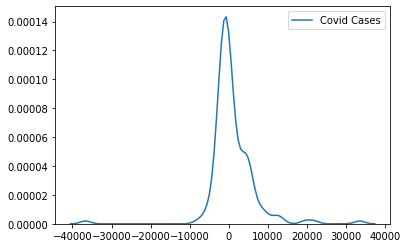

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)
***** 0.0


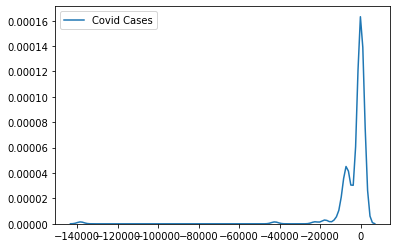

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=72, verbose=0,
                      warm_start=False)
***** 0.005026260530919147


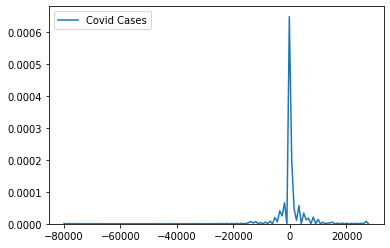

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=72, v

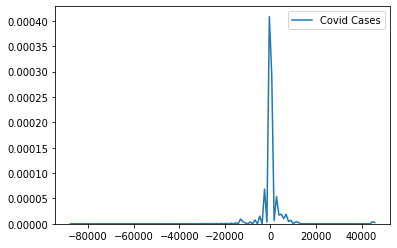

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
***** -448.46017238052406


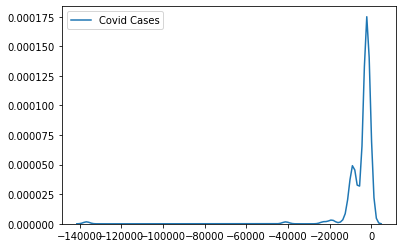

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score as acc
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

linear = LinearRegression()
sv = SVR()
rf = RandomForestRegressor(random_state=72)
xg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.01,
                max_depth = 5, alpha = 10, n_estimators = 10)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params1={
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "n_estimators"     : [100,300,500,700,800,1000],
 "max_features"     : [4,6,8,10]
}
random_search0=RandomizedSearchCV(rf,param_distributions=params1,n_iter=5,n_jobs=-1,cv=5,verbose=3)
random_search0.fit(x_train, y_train)



linear.fit(x_train,y_train)
sv.fit(x_train,y_train)
rf.fit(x_train,y_train)
xg.fit(x_train,y_train)
l = [linear,sv,rf, random_search0, xg]
for model in l:
    print(str(model))
    y = model.predict(x_test)
    print("*"*5,r2_score(y, y_test))
    sns.kdeplot(y-y_test)
    plt.show()

### we used random forest here for our predictions due to relatively less error and less spread as seen in the graph above

In [65]:
rf.score(x_train, y_train)


0.8914529139566552

In [66]:
train.head()

,Population11,Foreign Visitors,Covid Cases,LOW,MEDIUM,Type_M,Type_M.B,Type_M.Cl,Type_MPUA,Type_UA,Type_other_type,total_toilets
0,12442373,4408916.0,163115,0,1,0,0,0,0,0,1,34821.0
1,11007835,2379169.0,80188,0,1,0,0,0,0,0,1,31820.0
2,8436675,636502.0,141000,0,0,0,0,0,1,0,0,26076.0
3,6809970,126078.0,55123,0,1,0,0,0,1,0,0,23870.0
4,5570585,284973.0,33204,1,0,0,0,0,1,0,0,16571.0


In [67]:
test.head()

,Population11,Foreign Visitors,LOW,MEDIUM,Type_MPUA,Type_M,Type_M.B,Type_M.Cl,Type_UA,Type_other_type,total_toilets
0,36774,2769.0,0,1,0,0,0,0,0,1,1598.0
1,36754,636502.0,0,0,0,0,0,0,0,1,806.0
2,36732,242367.0,0,0,0,0,0,0,0,1,1071.0
3,36706,4408916.0,0,0,0,0,0,1,0,0,660.0
4,36669,3104060.0,1,0,0,0,0,0,0,1,2116.0


In [80]:
yr = rf.predict(test)

In [81]:
lst = []
for i in yr:
    lst.append(int(i))
    
df['Result'] = pd.DataFrame(lst)
df.head()

<IPython.core.display.Javascript object>

,0,Result
0,2509,2509
1,2333,2333
2,2293,2293
3,2307,2307
4,2358,2358


In [83]:
df.to_csv('result.csv')